In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("House_Price_Data.csv")

# ✅ FIX: Clean up missing or invalid values
df = df.dropna(subset=["Price"])          # Remove rows where Price is missing
df = df.dropna()                          # Remove any rows with NaN in other columns
df["Price"] = df["Price"].astype(float)   # Ensure Price is numeric
df["Location"] = df["Location"].str.strip()  # Remove extra spaces if any

print("Cleaned Data:")
print(df.head())
print("\nAny null values left?:")
print(df.isnull().sum())


Cleaned Data:
   House_ID     Location  Size_sqft  Bedrooms  Amenities_Score     Price
0         1  City Center       1200         2                8  150000.0
1         2       Suburb       1500         3                6  175000.0
2         3  City Center        850         1                9  130000.0
3         4       Suburb       1800         3                7  190000.0
4         5    Outskirts       2000         4                5  170000.0

Any null values left?:
House_ID           0
Location           0
Size_sqft          0
Bedrooms           0
Amenities_Score    0
Price              0
dtype: int64


In [3]:
# Step 3: Data Preprocessing
# Encode Location as numeric (City Center=2, Suburb=1, Outskirts=0)
df["Location"] = df["Location"].map({"Outskirts": 0, "Suburb": 1, "City Center": 2})

# Define features and target
X = df[["Location", "Size_sqft", "Bedrooms", "Amenities_Score"]]
y = df["Price"]

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on Test Data
y_pred = model.predict(X_test)

# Step 7: Evaluate Model
print("\nModel Evaluation:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Model Evaluation:
Mean Absolute Error: 13256.876748424858
Mean Squared Error: 271779775.80251366
R2 Score: 0.152171899792508


In [5]:
# Step 8: Compare Actual vs Predicted
results = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred})
print("\nActual vs Predicted Prices:")
print(results.head())


Actual vs Predicted Prices:
    Actual Price  Predicted Price
39      189000.0    160354.082734
25      165000.0    172833.226950
26      148000.0    154710.810082
44      147000.0    154710.810082
35      149000.0    152577.209461


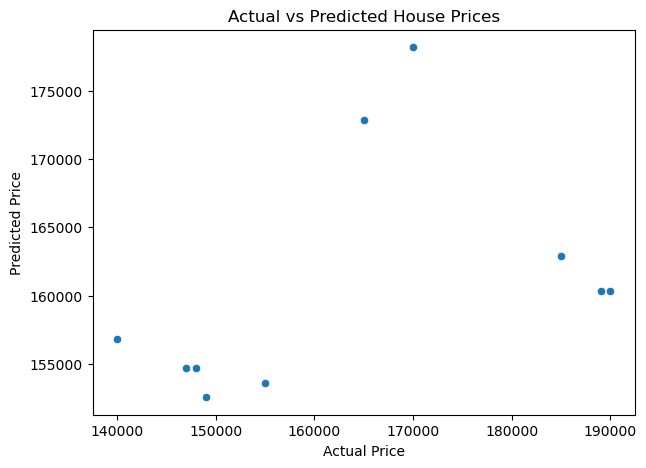

In [6]:
# Step 9: Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [7]:
# Step 10: Predict for a New House
new_house = pd.DataFrame({
    "Location": [2],          # City Center
    "Size_sqft": [1300],
    "Bedrooms": [3],
    "Amenities_Score": [8]
})

predicted_price = model.predict(new_house)
print(f"\nPredicted price for the new house: ${predicted_price[0]:,.2f}")


Predicted price for the new house: $161,264.15
